In [1]:
#GAN(Generative Adversarial Networks)은 딥러닝의 원리를 활용해 가상의 이미지를 생성하는 알고리즘이다
#예를 들어 얼굴을 만든다면 이미지 픽셀들이 어떻게 조합되어야 우리가 생각하는 얼굴의 형상이 되는지를 딥러닝 알고리즘이 예측한 결과
#GAN이라는 이름에는 적대적(Adversarial)이란 단어가 들어가는데 이것은 GAN알고리즘의 성격을 잘 말해준다
#진짜 같은 가짜를 만들기 위해 GAN 알고리즘 내부에는 적대적인 경합을 진행한다

In [2]:
#적대적인 경합을 쉽게 설명하기 위해 GAN의 아이디어를 처음으로 제안한 이안 굿펠로는 위조지폐범과 경찰에 비유함
#진짜 지폐와 똑같은 위조지폐를 만들기 위해 애쓰는 위조지폐범들과 이를 가려내기 위해 노력하는 경찰 사이의 경합이
#결국 더 정교한 위조지폐를 만들어 낸다
#한쪽은 가짜를 만들고 한쪽은 진짜와 비교하는 경함의 과정을 이용하는 것이 바로 GAN의 원리이다

In [3]:
#가짜를 만들어내는 파트를 '생성자(Generator)', 진위를 가려내는 파트를 '판별자(Discriminator)'라고 한다
#이러한 기본 구조 위에 여러 아이디어를 더한 GAN의 변형 알고리즘들이 직므도 계속해서 발표되고 있다
#페이스북의 연구팀이 만들어 발표한 DCGAN(Deep Convolutional GAN)은 컨볼루션신경망(CNN)을 GAN에 적용한 알고리즘으로
#불안정하던 초기 GAN을 크게 보완해주었다

### 생성자

In [5]:
#생성자는 가상의 이미지를 만들어 내는 공장이다
#랜덤한 픽셀 값으로 채워진 가짜 이미지로 시작해서 판별자의 판별 결과에 따라 지속적으로 업데이트하며 점차 원하는 이미지를 만들어간다
#DCGAN은 생성자가 가짜 이미지를 만들때, 컨볼루션 신경망(CNN)을 이용한다

In [6]:
#기존에 배웠던 CNN과 차이가 있는데, 먼저 옵티마이저를 사용하는 최적화 과정이나 컴파일 하는 과정이 없다
#판별과 학습이 이곳 생성자에서 일어나는 게 아니기 때문이다
#또한, 일부 매개 변수를 삭제하는 풀링(pooling)과정이 없고, 대신 앞 장에서 배운 패딩(padding)과정이 포함된다
#빈곳을 채워서 입력과 출력의 크기를 똑같이 맞추기 위해서이다
#패딩과정을 통해 생성자에서 출력되는 이미지의 크기를 조절해야 하는 이유는 판별자가 비교할 '진짜'와 똑같은 크기가 되어야 하기 때문이다
#케라스의 padding='same' 이라는 설정을 통해 입력과 출력의 크기가 다를경우 자동으로 크기를 확장해주고 확장된 공간에 0을 채운다

In [7]:
#DCGAN의 제안자들은 학습에 꼭 필요한 옵션들을 제시헀는데, 그중 하나가 '배치정규화(Batch Normalization)'라는 과정이다
#배치 정규화란 입력 데이터의 평균이 0, 분산이 1이 되도록 재배치 하는 것인데, 다음 층으로 입력된 값을 일정하게 재배치 하는 역할 수행
#이 과정을 통해 층의 개수가 늘어나도 안정적인 학습을 진행할 수 있다
#케라스에서는 BatchNormalization() 함수 제공

In [8]:
#생성자의 활성화 함수로는 ReLU()함수를 쓰고 판별자로 넘겨 주기 직전에는 tanh()함수를 사용
#tanh() 를 사용하면 출력값을 -1~1사이로 맞출수 있다

In [10]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Reshape, UpSampling2D, Conv2D, Activation, LeakyReLU

In [11]:
generator = Sequential()

In [12]:
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))

In [13]:
#여기서의 128은 임의로 정한 노드 수
#input_dim=100은 100차원의 크기의 랜덤 벡터를 준비해 집어넣으라는 의미, 100도 임의로 정해준 숫자
#7*7은 이미지의 최초 크기

In [14]:
generator.add(BatchNormalization())

In [15]:
#데이터의 배치를 정규분포로 만드는 배치 정규화

In [17]:
generator.add(Reshape((7,7,128)))

In [18]:
#컨볼루션 레이어가 받아들일 수 있는 형태로 바꾸어 주는 코드
#Conv2D 함수의 input_shape부분에 들어갈 형태로 정해준다

In [19]:
generator.add(UpSampling2D())

In [21]:
#최초 이미지 크기가 7*7이므로 UpSampling2D()함수를 통해 이미지의 가로, 세로 크기를 2배씩 늘려준다
#함수를 한번 적용하였으니 14*14 크기가 되었다

In [22]:
generator.add(Conv2D(64, kernel_size=5, padding='same'))

In [23]:
#커널크기를 5로 해서 5*5 크기의 마스크를 사용
#padding='same' 조검으로 모자라는 부분은 자동으로 0으로 채워진다

In [24]:
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))

In [25]:
#GAN에서는 기존에 사용하던 ReLU()함수를 쓸 경우 학습이 불안정해 지는 경우가 많아, ReLU()를 조금 변형한 LeakyReLU()함수를 사용
#LeakyReLU() 함수는 ReLU()함수에서 x값이 음수이면 무조건 0이 되어 뉴런들이 일찍 소실되는 단점을 보완하기 위해, 
#0이하에서도 작은 값을 갖게 만드는 활성화 함수이다. 
#케라스함수를 이용해 LeakyReLU(0.2)와 같은 형태로 설정하면 0보다 작을경우 0.2를 곱하라는 의미

In [26]:
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [27]:
#끝으로 한번 더 컨볼루션 과정을 거친 후 판별자로 값을 넘길 준비를 마친다

### - 코드정리

In [29]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, Reshape

generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

### 판별자

In [30]:
#생성자에서 넘어온 이미지가 진짜인지 가짜인지를 판별해 주는 장치인 판별자(Discriminator)를 만들어보자
#판별자는 컨볼루션 신경망(CNN)의 구조를 그대로 가지고 와서 만들면 된다
#CNN이란게 원래 무언가를 구별하는 데에 최적화된 알고리즘이기 때문에 그 목적 그대로 사용하면 되는 것이다
#진짜(1) 아니면 가짜(0), 둘 중 하나를 결정하는 문제이므로 컴파일 부분은 로스함수로 binary_crossentropy와 최적화함수adam을 그대로 사용

In [31]:
#주의할 점은 판별자는 진짜인지 가짜인지를 판별해 줄 뿐, 자기 자신이 학습을 해서는 안된다는 것이다
#판별자가 얻은 가중치는 판별자 자신이 학습하는데 쓰는것이 아니라 생성자로 넘겨 주어 생성자가 업데이트된 이미지를 만들도록 해야한다
#따라서 판별자를 만들 때는 가중치를 저장하는 학습 기능을 꺼야 한다(discriminator.trainable=False)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, LeakyReLU, Dropout, Flatten

In [34]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))

In [35]:
#strides=2는 마스크를 2칸씩 이동하라는 소리, 특별한 설정이 없으면 마스크는 1칸씩 이동한다
#2칸씩 이동하면 가로, 세로 크기가 더 줄어 들어 새로운 특징을 뽑아주는 효과가 생긴다
#Dropout이나 MaxPooling 처럼 새로운 필터를 적용한 효과가 생긴다
#생성자에서는 출력 수를 28로 맞추어야 하기 때문에 오히려 UpSampling을 통해 가로 세로수를 늘려주었지만
#판별자는 진짜와 가짜만 구분하면되기 때문에 그럴 필요가 없다
#strides나 드롭아웃등 차원을 줄여주는 기능을 적극적으로 사용하면서 CNN의 본래 목적만 달성하면 된다

In [36]:
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())

In [37]:
#가로 세로 2차원으로 진행된 과정을 1차원으로 바꾸어 주는 Flatten()함수

In [38]:
discriminator.add(Dense(1, activation='sigmoid'))

In [39]:
#판별의 결과가 진짜(1), 혹은 가짜(0) 둘 중 하나가 되어야 하므로 활성화함수로 sigmoid를 사용

In [40]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False

In [41]:
#discriminator.trainable=False을 통해 판별자 자신이 학습되지 않게끔 학습 기능을 꺼준다

#### - 코드 정리

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, LeakyReLU

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainabel=False

### 적대적 신경망 연결하기

In [43]:
#생성자와 판별자를 연결시키고 학습을 진행하며 기타 여러가지 옵션을 설정해 보자
#생성자와 판별자를 연결시킨다는 것은 생성자에서 나온 출력을 판별자에 넣어서 진위여부를 판별하게 만든다는 뜻

In [44]:
#생성자 G()에 입력값 input을 넣은 결과는 G(input)
#이것을 판별자D()에 넣은 결과는 D(G(input))
#생성자는 D(G(input))이 참(1)이라 주장하지만, 판별자는 실제 데이터인 x로 만든 D(x)만이 참이라고 여긴다
#그러다 학습이 진행될수록 생성자가 만든 G(input)이 실제와 너무 가까워져서 
#이것으로 만든 D(G(input))과 실제 데이터로 만든 D(x)를 잘 구별하지 못하게 된다
#너무나도 유사해진 D(G(input))와 D(x)를 판별자가 더는 구별하지 못하게 되어 정확도가 0.5에 가까워질때, 
#비로소 생성자는 자신의 역할을 다하게 되어 학습은 종효된다

In [45]:
from keras.layers import Input 
from keras.models import Sequential, Model

In [47]:
ginput = Input(shape=(100,))

In [49]:
#랜덤한 100개의 벡터를 케라스의 Input()함수에 집어넣어 생성자에 입력할 ginput을 만드는 과정

In [50]:
dis_output = discriminator(generator(ginput))

In [51]:
#생성자모델 generator()에 ginput을 입력한다.
#그 결과 출력되는 28*28 크기의 이미지가 그대로 판별자모델 discriminator()의 입력값으로 들어간다
#판별자는 이 입력값을 가지고 참과 거짓을 판별하는데, 그 결과를 dis_output이라 한다

In [52]:
gan = Model(ginput, dis_output)

In [53]:
#케라스의 Model()함수를 이용해 ginput값과 dis_output값을 넣어 gan이라는 이름의 새로운 모델을 만든다

In [54]:
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
#참과 거짓을 구분하는 binary_crossentropy와 최적화 함수 adam을 사용해 gan 모델을 컴파일한다

In [56]:
#이렇게 생성자와 판별자를 연결하는 gan모델을 만들었다
#이제 지금까지의 모든 과정을 실행할 함수를 만들어보자

In [57]:
#gan_train()이란 함수를 통해 학습이 진행되도록 한다 
#이때 변수는 epoch, batch_siz 그리고 중간과정을 저장할 때 몇번마다 한번씩 저장할지 정허는 save_interval 이렇게 3가지로 정한다
#판별자에서 사용할 MNIST 손글씨 데이터도 불러온다
#앞서 생성자 편에서 tanh()함수를 사용한 이유는 지금 불러올 데이터의 픽셀 값을 -1~1사이의 값으로 지정하기 위해서였다
#0~255까지의 값으로 되어있는 픽셀 값을 -1~1사이의 값으로 바꾸려면 현재의 픽셀값에서 127.5를 뺀 뒤 127.5로 나누면 된다

In [62]:
from keras.datasets import mnist
import numpy as np


def gan_train(epoch, batch_size, saving_interval): #세가지 변수를 지정
    #MNIST데이터 불러오기
    #MNIST데리터를 다시 불러와 이용. 단, 테스트 과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 호출
    (X_train,_),(_,_) = mnist.load_data
    
    #가로28, 세로28 픽셀이고 흑백이므로 1을 설정
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    
    #0~255사이의 픽셀값에서 127.5를 뺀 후, 127.5로 나누면 -1~1 사이의 값으로 바뀜
    X_train = (X_train - 127.5) / 127.5

In [61]:
#batch_size는 한번에 몇개의 실제 이미지와 몇개의 가상 이미지를 판별자에 넣을지를 결정하는 변수이다
#먼저 batch_size만큼 MNIST 손글씨 이미지를 랜덤하게 불러와 판별자에 집어넣는 과정은 다음과 같다
#실제 이미지를 입력했으므로 모두 참(1)이라는 레이블을 붙인다

In [65]:
def gan_train(epoch, batch_size, saving_interval): #세가지 변수를 지정
    (X_train,_),(_,_) = mnist.load_data
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5
    
    #'모두 참(1)'이라는 레이블 값을 가진 배열을 batch_size 길이만큼 만든다
    #np.ones(행,열)은 배열을 모두 1로 채운다
    true = np.ones((batch_size, 1))
    
    #random함수를 이용해 실제 이미지를 랜덤하게 선택해 불러온다
    #np.random.randint(a,b,c)는 a부터 b까지의 숫자 중 하나를 랜덤하게 선택해 가져오는 과정을 c번 반복하라는 뜻
    #0부터 X_train 개수 사이의 숫자를 랜덤하게 선택해 batch_size만큼 반복해서 가져오게 한다
    idx = np.random.randint(0, X_train[0], batch_size)
    
    #위에서 선택된 숫자에 해당하는 이미지를 가져온다
    imgs = X_train[idx]
    
    #판별자 모델에 train_on_batch()함수를 써서 판별을 시작한다
    #train_on_batch(x, y) 함수는 입력값(x)와 레이블(y)을 받아서 딱 한 번 학습을 실시해 모델을 업데이트 한다
    #위에서 만든 imgs를 x에 넣고 위에서 만든 ture배열을 y에 놓아 준비를 마친다
    d_loss_real = discriminator.train_on_batch(imgs, true)

In [66]:
#실제 이미지에 이어서 이번에는 생성자에서 만든 가상의 이미지를 판별자에 넣어보자
#가상의 이미지는 모두 가짜(0)라는 레이블을 준비해 붙인다
#학습이 반복될수록 가짜라는 레이블을 붙인 이미지들에 대한 예측 결과가 거짓으로 나올 것이다

In [67]:
def gan_train(epoch, batch_size, saving_interval): #세가지 변수를 지정
    (X_train,_),(_,_) = mnist.load_data
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    idx = np.random.randint(0, X_train[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)
    
    #모두 가짜(0)라는 레이블 값을 가진 열을 batch_size길이만큼 만든다
    #np.zeros(행,열)은 배열을 모두 0으로 채운다
    fake = np.zeros((batch_size, 1))
    
    #생성자에 집어넣을 가상 이미지를 만든다
    #정수가 아니기 때문에 np.random.normal() 함수를 사용했다
    #np.random.normal(a,b,c) 형태를 가지며 a부터 b까지의 실수 중 c개를 랜덤으로 뽑으라는 뜻
    #c자리에 있는 (batch_size, 100)은 batch_size만큼 100열을 뽑으라는 소리
    noise = np.random.normal(0,1, (batch_size, 100))
    
    #위에서 만들어진 noise값이 생성자에 들어가고 결과값이 gen_imgs로 저장된다
    gen_imgs = generator.predict(noise)
    
    #gen_imgs에 모두 가짜(0)라는 fake값을 가진 레이블이 붙는다
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

In [68]:
#이제 실제 이미지를 넣은 d_loss_real과 가상 이미지를 넣은 d_loss_fake가 판별자 안에서 번갈아가며 진위를 판단하기 시작한다

In [70]:
def gan_train(epoch, batch_size, saving_interval): #세가지 변수를 지정
    (X_train,_),(_,_) = mnist.load_data
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    idx = np.random.randint(0, X_train[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)
    
    fake = np.zeros((batch_size, 1))
    noise = np.random.normal(0,1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    
    #d_loss_real, d_loss_fake 값을 더해 둘로 나눈 평균이 바로 판별자 오차인 d_loss 값
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

In [71]:
#판별자와 생성자를 연결해서 만든 gan 모델을 이용해 생성자의 오차, g_loss를 구해보자
#train_on_batch() 함수와 앞서 만든 gen_imgs를 사용한다
#생성자의 레이블은 무조건 참(1)이라 해놓고 판별자로 넘긴다
#따라서 이번에도 앞서 만든 true배열로 레이블을 붙인다

In [ ]:
# 보통 학습할 때 .fit을 사용하는데 여기서는 .train_on_batch를 사용
# .fit의 경우, epochs, batch_size를 한번에 넘겨주는데 반해
# .train_on_batch의 경우는 현재 전달받은 데이터를 모두 활용해서 gradient vector를 계산해서 업데이트 합니다.
# GAN에서는 매번 Generator가 새로운 fake image를 만들기 때문에, epoch마다 새로운 데이터를 넘겨주어야 합니다. 
# .train_on_batch를 사용하는 것이 더 좋습니다. 또한 train_on_batch는 리턴값이 score라서 관리하기 편하기도 하구요.

In [72]:
def gan_train(epoch, batch_size, saving_interval): #세가지 변수를 지정
    (X_train,_),(_,_) = mnist.load_data
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_train = (X_train - 127.5) / 127.5

    true = np.ones((batch_size, 1))
    idx = np.random.randint(0, X_train[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)
    
    fake = np.zeros((batch_size, 1))
    noise = np.random.normal(0,1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    
    #판별자 오차
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    #생성자 오차
    g_loss = gan.train_on_batch(noise, true)
    #학습이 진행되는 동안 생성자와 판별자의 오차가 출력되게 한다
    print('d_loss:%.4f' %d_loss, 'g_loss:%.4f' %g_loss)

### - GAN 코드 정리

In [73]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Input, Reshape, Dropout, BatchNormalization, Activation, LeakyReLU, UpSampling2D

import numpy as np
import matplotlib.pyplot as plt

In [81]:
#생성자 모델 만들기
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [82]:
#판별자 모델 만들기
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [83]:
#생성자와 판별자를 연결시키는 gan 모델 만들기
ginput = Input(shape=(100,))

dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_11 (Sequential)   (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_12 (Sequential)   (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [93]:
#신경망을 실행시키는 함수 만들기
def gan_train(epoch, batch_size, saving_interval):
    (X_train,_),(_,_) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
    X_train = (X_train - 127.5) / 127.5
    
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for i in range(epoch):
        #실제 데이터를 판별자에 입력
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)
        
        #가상 이미지를 판별자에 입력
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        
        #판별자 오차
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        #생성자 오차
        g_loss = gan.train_on_batch(noise, true)
        
        print('epoch:%d' %i, 'd_loss:%.4f' %d_loss, 'g_loss:%.4f' %g_loss)
        
        #중간과정을 이미지로 저장하는 부분
        #정해진 인터벌만큼 학습되면 그때 만든 이미지를 gan_imges 폴더에 저장하라는 뜻
        if i % saving_interval == 0:
            #r, c = 5, 5
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)

            # Rescale images 0 - 1
            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
                    count += 1
            fig.savefig("gan_images/gan_mnist_%d.png" % i)

epoch:0 d_loss:0.4338 g_loss:0.0846
epoch:1 d_loss:0.5105 g_loss:0.0273
epoch:2 d_loss:0.5481 g_loss:0.0337
epoch:3 d_loss:0.5079 g_loss:0.0939
epoch:4 d_loss:0.4655 g_loss:0.2834
epoch:5 d_loss:0.4702 g_loss:0.4933
epoch:6 d_loss:0.4812 g_loss:0.6385
epoch:7 d_loss:0.4782 g_loss:0.6757
epoch:8 d_loss:0.4576 g_loss:0.6806
epoch:9 d_loss:0.4370 g_loss:0.6855
epoch:10 d_loss:0.4532 g_loss:0.7144
epoch:11 d_loss:0.4952 g_loss:0.6640
epoch:12 d_loss:0.6366 g_loss:0.6136
epoch:13 d_loss:0.6858 g_loss:0.8488
epoch:14 d_loss:0.5542 g_loss:0.7871
epoch:15 d_loss:0.5485 g_loss:0.8408
epoch:16 d_loss:0.5131 g_loss:0.7043
epoch:17 d_loss:0.4944 g_loss:0.5755
epoch:18 d_loss:0.4677 g_loss:0.4881
epoch:19 d_loss:0.4333 g_loss:0.5617
epoch:20 d_loss:0.3835 g_loss:0.7205
epoch:21 d_loss:0.4094 g_loss:0.8146
epoch:22 d_loss:0.3908 g_loss:0.8371
epoch:23 d_loss:0.3963 g_loss:0.7925
epoch:24 d_loss:0.3899 g_loss:0.7367
epoch:25 d_loss:0.3278 g_loss:1.0246
epoch:26 d_loss:0.3968 g_loss:0.9940
epoch:27 d_

epoch:219 d_loss:0.5363 g_loss:2.0439
epoch:220 d_loss:0.5763 g_loss:2.1160
epoch:221 d_loss:0.4232 g_loss:2.0926
epoch:222 d_loss:0.4977 g_loss:1.8656
epoch:223 d_loss:0.4296 g_loss:2.0887
epoch:224 d_loss:0.3954 g_loss:2.3297
epoch:225 d_loss:0.4752 g_loss:2.1204
epoch:226 d_loss:0.6028 g_loss:1.7685
epoch:227 d_loss:0.5864 g_loss:1.5614
epoch:228 d_loss:0.4235 g_loss:1.5645
epoch:229 d_loss:0.4650 g_loss:1.8569
epoch:230 d_loss:0.3878 g_loss:2.0385
epoch:231 d_loss:0.4496 g_loss:1.9114
epoch:232 d_loss:0.6112 g_loss:2.0446
epoch:233 d_loss:0.5472 g_loss:1.5990
epoch:234 d_loss:0.5000 g_loss:2.0152
epoch:235 d_loss:0.4809 g_loss:2.0680
epoch:236 d_loss:0.4206 g_loss:2.2294
epoch:237 d_loss:0.4565 g_loss:2.6115
epoch:238 d_loss:0.4384 g_loss:2.3306
epoch:239 d_loss:0.4650 g_loss:2.1789
epoch:240 d_loss:0.4149 g_loss:1.8265
epoch:241 d_loss:0.4506 g_loss:1.6454
epoch:242 d_loss:0.3647 g_loss:2.3167
epoch:243 d_loss:0.4314 g_loss:2.1430
epoch:244 d_loss:0.4164 g_loss:2.1982
epoch:245 d_

epoch:435 d_loss:0.3596 g_loss:1.9627
epoch:436 d_loss:0.3451 g_loss:2.2933
epoch:437 d_loss:0.4794 g_loss:2.4114
epoch:438 d_loss:0.4947 g_loss:1.7889
epoch:439 d_loss:0.4451 g_loss:1.6545
epoch:440 d_loss:0.4266 g_loss:2.0002
epoch:441 d_loss:0.3514 g_loss:2.1435
epoch:442 d_loss:0.4414 g_loss:2.1297
epoch:443 d_loss:0.4412 g_loss:1.9544
epoch:444 d_loss:0.4679 g_loss:2.0271
epoch:445 d_loss:0.3353 g_loss:2.1800
epoch:446 d_loss:0.2763 g_loss:2.5125
epoch:447 d_loss:0.4202 g_loss:2.4173
epoch:448 d_loss:0.4140 g_loss:2.3547
epoch:449 d_loss:0.2379 g_loss:2.4289
epoch:450 d_loss:0.3620 g_loss:2.1396
epoch:451 d_loss:0.2343 g_loss:2.6273
epoch:452 d_loss:0.2478 g_loss:2.2242
epoch:453 d_loss:0.2390 g_loss:2.7557
epoch:454 d_loss:0.2170 g_loss:2.6007
epoch:455 d_loss:0.1409 g_loss:3.1250
epoch:456 d_loss:0.1278 g_loss:3.3566
epoch:457 d_loss:0.1512 g_loss:3.1753
epoch:458 d_loss:0.1844 g_loss:3.3192
epoch:459 d_loss:0.1194 g_loss:3.2269
epoch:460 d_loss:0.1908 g_loss:2.6237
epoch:461 d_

epoch:651 d_loss:1.1525 g_loss:1.6643
epoch:652 d_loss:0.3291 g_loss:2.7071
epoch:653 d_loss:0.2253 g_loss:3.8973
epoch:654 d_loss:0.3420 g_loss:4.6192
epoch:655 d_loss:0.6535 g_loss:3.8950
epoch:656 d_loss:0.3202 g_loss:2.7967
epoch:657 d_loss:0.4232 g_loss:2.0918
epoch:658 d_loss:0.5280 g_loss:1.6994
epoch:659 d_loss:0.3800 g_loss:1.3355
epoch:660 d_loss:0.2850 g_loss:1.9624
epoch:661 d_loss:0.3386 g_loss:2.7948
epoch:662 d_loss:0.3021 g_loss:2.4505
epoch:663 d_loss:0.2535 g_loss:2.6811
epoch:664 d_loss:0.3024 g_loss:2.4817
epoch:665 d_loss:0.4138 g_loss:2.1372
epoch:666 d_loss:0.3448 g_loss:1.8904
epoch:667 d_loss:0.1456 g_loss:2.5667
epoch:668 d_loss:0.4078 g_loss:2.1901
epoch:669 d_loss:0.2637 g_loss:3.0721
epoch:670 d_loss:0.3256 g_loss:2.6992
epoch:671 d_loss:0.2984 g_loss:2.8695
epoch:672 d_loss:0.3642 g_loss:2.7993
epoch:673 d_loss:0.4149 g_loss:2.6914
epoch:674 d_loss:0.4753 g_loss:2.1040
epoch:675 d_loss:0.3363 g_loss:2.9115
epoch:676 d_loss:1.2154 g_loss:2.9160
epoch:677 d_

epoch:867 d_loss:0.4293 g_loss:1.8222
epoch:868 d_loss:0.4524 g_loss:1.8706
epoch:869 d_loss:0.3205 g_loss:1.5254
epoch:870 d_loss:0.3246 g_loss:1.9133
epoch:871 d_loss:0.3870 g_loss:1.7913
epoch:872 d_loss:0.3045 g_loss:1.8736
epoch:873 d_loss:0.2756 g_loss:2.2504
epoch:874 d_loss:0.2836 g_loss:1.9870
epoch:875 d_loss:0.4427 g_loss:1.5607
epoch:876 d_loss:0.3481 g_loss:1.7804
epoch:877 d_loss:0.2029 g_loss:2.0715
epoch:878 d_loss:0.3240 g_loss:1.9860
epoch:879 d_loss:0.2634 g_loss:2.3468
epoch:880 d_loss:0.3608 g_loss:2.3344
epoch:881 d_loss:0.2916 g_loss:2.4070
epoch:882 d_loss:0.2223 g_loss:2.5733
epoch:883 d_loss:0.3001 g_loss:2.0038
epoch:884 d_loss:0.3484 g_loss:2.3620
epoch:885 d_loss:0.1987 g_loss:2.4360
epoch:886 d_loss:0.2997 g_loss:2.7067
epoch:887 d_loss:0.2444 g_loss:3.0530
epoch:888 d_loss:0.3569 g_loss:2.7832
epoch:889 d_loss:0.3773 g_loss:2.9552
epoch:890 d_loss:0.2621 g_loss:2.7193
epoch:891 d_loss:0.3009 g_loss:2.7950
epoch:892 d_loss:0.3633 g_loss:2.4791
epoch:893 d_

epoch:1081 d_loss:0.5298 g_loss:1.5780
epoch:1082 d_loss:0.3415 g_loss:2.0881
epoch:1083 d_loss:0.5640 g_loss:1.6769
epoch:1084 d_loss:0.6240 g_loss:1.8215
epoch:1085 d_loss:0.4454 g_loss:2.3564
epoch:1086 d_loss:0.4340 g_loss:2.4435
epoch:1087 d_loss:0.4723 g_loss:2.0606
epoch:1088 d_loss:0.4993 g_loss:1.6986
epoch:1089 d_loss:0.4958 g_loss:1.8235
epoch:1090 d_loss:0.4035 g_loss:1.5866
epoch:1091 d_loss:0.5190 g_loss:1.7341
epoch:1092 d_loss:0.4617 g_loss:1.5218
epoch:1093 d_loss:0.3057 g_loss:2.1953
epoch:1094 d_loss:0.4365 g_loss:2.2446
epoch:1095 d_loss:0.3719 g_loss:2.5351
epoch:1096 d_loss:0.4547 g_loss:1.6436
epoch:1097 d_loss:0.3544 g_loss:1.5226
epoch:1098 d_loss:0.4176 g_loss:1.6956
epoch:1099 d_loss:0.4037 g_loss:2.0681
epoch:1100 d_loss:0.4507 g_loss:2.0561
epoch:1101 d_loss:0.3743 g_loss:2.1879
epoch:1102 d_loss:0.3792 g_loss:2.3928
epoch:1103 d_loss:0.4322 g_loss:2.4563
epoch:1104 d_loss:0.3290 g_loss:1.7430
epoch:1105 d_loss:0.3688 g_loss:1.8027
epoch:1106 d_loss:0.3347 

epoch:1292 d_loss:0.3879 g_loss:1.7966
epoch:1293 d_loss:0.4554 g_loss:1.9195
epoch:1294 d_loss:0.3525 g_loss:1.9839
epoch:1295 d_loss:0.4562 g_loss:2.5414
epoch:1296 d_loss:0.4394 g_loss:2.6477
epoch:1297 d_loss:0.3113 g_loss:2.3868
epoch:1298 d_loss:0.3147 g_loss:2.4149
epoch:1299 d_loss:0.3744 g_loss:2.2462
epoch:1300 d_loss:0.2344 g_loss:2.1248
epoch:1301 d_loss:0.2307 g_loss:2.1732
epoch:1302 d_loss:0.2769 g_loss:2.3309
epoch:1303 d_loss:0.3528 g_loss:2.3860
epoch:1304 d_loss:0.2936 g_loss:2.2202
epoch:1305 d_loss:0.3520 g_loss:2.3189
epoch:1306 d_loss:0.3233 g_loss:2.3381
epoch:1307 d_loss:0.2577 g_loss:2.2916
epoch:1308 d_loss:0.3878 g_loss:2.1027
epoch:1309 d_loss:0.3332 g_loss:2.4735
epoch:1310 d_loss:0.2664 g_loss:2.3852
epoch:1311 d_loss:0.3611 g_loss:2.3001
epoch:1312 d_loss:0.5448 g_loss:1.9697
epoch:1313 d_loss:0.3147 g_loss:2.3788
epoch:1314 d_loss:0.4906 g_loss:2.0269
epoch:1315 d_loss:0.3422 g_loss:2.4069
epoch:1316 d_loss:0.3172 g_loss:2.5252
epoch:1317 d_loss:0.4393 

epoch:1503 d_loss:0.4309 g_loss:1.7574
epoch:1504 d_loss:0.3902 g_loss:1.8593
epoch:1505 d_loss:0.5230 g_loss:1.8080
epoch:1506 d_loss:0.4778 g_loss:1.4416
epoch:1507 d_loss:0.3694 g_loss:1.6015
epoch:1508 d_loss:0.4452 g_loss:1.6462
epoch:1509 d_loss:0.2854 g_loss:2.3765
epoch:1510 d_loss:0.2992 g_loss:2.4162
epoch:1511 d_loss:0.3599 g_loss:2.6039
epoch:1512 d_loss:0.2938 g_loss:2.3198
epoch:1513 d_loss:0.3830 g_loss:2.1459
epoch:1514 d_loss:0.3995 g_loss:1.5406
epoch:1515 d_loss:0.4184 g_loss:1.8618
epoch:1516 d_loss:0.3982 g_loss:2.3996
epoch:1517 d_loss:0.4141 g_loss:2.0612
epoch:1518 d_loss:0.4869 g_loss:2.5408
epoch:1519 d_loss:0.3957 g_loss:2.2429
epoch:1520 d_loss:0.3522 g_loss:1.9616
epoch:1521 d_loss:0.3327 g_loss:1.9663
epoch:1522 d_loss:0.4884 g_loss:2.0766
epoch:1523 d_loss:0.5115 g_loss:1.8457
epoch:1524 d_loss:0.3794 g_loss:2.1061
epoch:1525 d_loss:0.3543 g_loss:2.4091
epoch:1526 d_loss:0.4687 g_loss:1.7281
epoch:1527 d_loss:0.3170 g_loss:1.8919
epoch:1528 d_loss:0.4737 

epoch:1714 d_loss:0.3420 g_loss:1.7867
epoch:1715 d_loss:0.5996 g_loss:1.6641
epoch:1716 d_loss:0.4768 g_loss:1.3578
epoch:1717 d_loss:0.4680 g_loss:1.6301
epoch:1718 d_loss:0.3586 g_loss:1.9328
epoch:1719 d_loss:0.3377 g_loss:1.8130
epoch:1720 d_loss:0.4618 g_loss:1.8602
epoch:1721 d_loss:0.3920 g_loss:1.7968
epoch:1722 d_loss:0.3866 g_loss:1.8616
epoch:1723 d_loss:0.4547 g_loss:1.4303
epoch:1724 d_loss:0.4038 g_loss:1.6984
epoch:1725 d_loss:0.3699 g_loss:2.0127
epoch:1726 d_loss:0.3832 g_loss:1.6548
epoch:1727 d_loss:0.4865 g_loss:1.7249
epoch:1728 d_loss:0.5306 g_loss:2.1383
epoch:1729 d_loss:0.4055 g_loss:2.0624
epoch:1730 d_loss:0.3970 g_loss:1.9196
epoch:1731 d_loss:0.4433 g_loss:1.8467
epoch:1732 d_loss:0.3519 g_loss:1.9984
epoch:1733 d_loss:0.2884 g_loss:1.7358
epoch:1734 d_loss:0.2929 g_loss:1.8925
epoch:1735 d_loss:0.3262 g_loss:2.0195
epoch:1736 d_loss:0.4515 g_loss:1.7233
epoch:1737 d_loss:0.4603 g_loss:1.5967
epoch:1738 d_loss:0.6055 g_loss:1.4607
epoch:1739 d_loss:0.4378 

epoch:1925 d_loss:0.5207 g_loss:1.4000
epoch:1926 d_loss:0.5929 g_loss:1.4099
epoch:1927 d_loss:0.5636 g_loss:1.4356
epoch:1928 d_loss:0.4743 g_loss:1.3826
epoch:1929 d_loss:0.4431 g_loss:1.7317
epoch:1930 d_loss:0.4787 g_loss:1.8399
epoch:1931 d_loss:0.4955 g_loss:1.9099
epoch:1932 d_loss:0.4640 g_loss:1.3412
epoch:1933 d_loss:0.5425 g_loss:1.5081
epoch:1934 d_loss:0.6118 g_loss:1.3731
epoch:1935 d_loss:0.5645 g_loss:1.2830
epoch:1936 d_loss:0.4568 g_loss:1.4035
epoch:1937 d_loss:0.4005 g_loss:1.9696
epoch:1938 d_loss:0.4680 g_loss:1.9512
epoch:1939 d_loss:0.5354 g_loss:1.7343
epoch:1940 d_loss:0.5832 g_loss:1.6464
epoch:1941 d_loss:0.5016 g_loss:1.4945
epoch:1942 d_loss:0.5201 g_loss:1.1306
epoch:1943 d_loss:0.4059 g_loss:1.4942
epoch:1944 d_loss:0.5008 g_loss:1.6083
epoch:1945 d_loss:0.4548 g_loss:1.5761
epoch:1946 d_loss:0.5261 g_loss:1.4569
epoch:1947 d_loss:0.3137 g_loss:2.0364
epoch:1948 d_loss:0.4141 g_loss:1.8103
epoch:1949 d_loss:0.3878 g_loss:1.4500
epoch:1950 d_loss:0.3492 

epoch:2136 d_loss:0.4165 g_loss:1.5346
epoch:2137 d_loss:0.4212 g_loss:1.5191
epoch:2138 d_loss:0.5574 g_loss:1.5668
epoch:2139 d_loss:0.4799 g_loss:1.7689
epoch:2140 d_loss:0.4839 g_loss:1.3825
epoch:2141 d_loss:0.4530 g_loss:1.3094
epoch:2142 d_loss:0.5282 g_loss:1.6221
epoch:2143 d_loss:0.5343 g_loss:1.4910
epoch:2144 d_loss:0.4484 g_loss:1.7040
epoch:2145 d_loss:0.5283 g_loss:1.7117
epoch:2146 d_loss:0.5419 g_loss:1.5737
epoch:2147 d_loss:0.4880 g_loss:1.7441
epoch:2148 d_loss:0.5294 g_loss:1.4149
epoch:2149 d_loss:0.4680 g_loss:1.4113
epoch:2150 d_loss:0.5374 g_loss:1.5765
epoch:2151 d_loss:0.4756 g_loss:1.1882
epoch:2152 d_loss:0.5017 g_loss:1.3802
epoch:2153 d_loss:0.5272 g_loss:1.3914
epoch:2154 d_loss:0.5468 g_loss:1.6333
epoch:2155 d_loss:0.4796 g_loss:1.5900
epoch:2156 d_loss:0.4751 g_loss:1.3549
epoch:2157 d_loss:0.5167 g_loss:1.3389
epoch:2158 d_loss:0.5608 g_loss:1.6684
epoch:2159 d_loss:0.5606 g_loss:1.4437
epoch:2160 d_loss:0.3429 g_loss:1.5968
epoch:2161 d_loss:0.5092 

epoch:2347 d_loss:0.6462 g_loss:1.7599
epoch:2348 d_loss:0.7754 g_loss:1.2221
epoch:2349 d_loss:0.4771 g_loss:1.3794
epoch:2350 d_loss:0.5314 g_loss:1.3046
epoch:2351 d_loss:0.3888 g_loss:1.5279
epoch:2352 d_loss:0.4458 g_loss:1.4515
epoch:2353 d_loss:0.4716 g_loss:1.6371
epoch:2354 d_loss:0.3394 g_loss:1.7790
epoch:2355 d_loss:0.3724 g_loss:1.7110
epoch:2356 d_loss:0.4532 g_loss:1.7779
epoch:2357 d_loss:0.4751 g_loss:1.5860
epoch:2358 d_loss:0.4928 g_loss:1.5736
epoch:2359 d_loss:0.4425 g_loss:1.7722
epoch:2360 d_loss:0.3941 g_loss:1.8878
epoch:2361 d_loss:0.3302 g_loss:1.8840
epoch:2362 d_loss:0.4656 g_loss:1.7707
epoch:2363 d_loss:0.4044 g_loss:1.4926
epoch:2364 d_loss:0.5429 g_loss:1.4008
epoch:2365 d_loss:0.4002 g_loss:1.6384
epoch:2366 d_loss:0.4011 g_loss:1.7009
epoch:2367 d_loss:0.7022 g_loss:1.4943
epoch:2368 d_loss:0.5389 g_loss:1.7586
epoch:2369 d_loss:0.4561 g_loss:1.6120
epoch:2370 d_loss:0.5006 g_loss:1.3875
epoch:2371 d_loss:0.5901 g_loss:1.1343
epoch:2372 d_loss:0.4938 

epoch:2558 d_loss:0.5023 g_loss:1.7577
epoch:2559 d_loss:0.3327 g_loss:1.8464
epoch:2560 d_loss:0.5053 g_loss:1.3657
epoch:2561 d_loss:0.4929 g_loss:1.1889
epoch:2562 d_loss:0.5459 g_loss:1.6802
epoch:2563 d_loss:0.4930 g_loss:1.2924
epoch:2564 d_loss:0.4294 g_loss:1.4415
epoch:2565 d_loss:0.3987 g_loss:1.9703
epoch:2566 d_loss:0.3556 g_loss:2.0211
epoch:2567 d_loss:0.3382 g_loss:2.4249
epoch:2568 d_loss:0.4836 g_loss:1.9878
epoch:2569 d_loss:0.5748 g_loss:1.4483
epoch:2570 d_loss:0.4814 g_loss:1.4542
epoch:2571 d_loss:0.4284 g_loss:1.3862
epoch:2572 d_loss:0.4713 g_loss:1.7214
epoch:2573 d_loss:0.4334 g_loss:1.7074
epoch:2574 d_loss:0.5337 g_loss:1.3773
epoch:2575 d_loss:0.4982 g_loss:1.6076
epoch:2576 d_loss:0.3831 g_loss:1.7588
epoch:2577 d_loss:0.4459 g_loss:1.6169
epoch:2578 d_loss:0.6184 g_loss:1.5263
epoch:2579 d_loss:0.5515 g_loss:1.7152
epoch:2580 d_loss:0.5319 g_loss:1.6683
epoch:2581 d_loss:0.6165 g_loss:1.3300
epoch:2582 d_loss:0.5434 g_loss:1.8832
epoch:2583 d_loss:0.5500 

epoch:2769 d_loss:0.4658 g_loss:1.7620
epoch:2770 d_loss:0.5426 g_loss:1.4773
epoch:2771 d_loss:0.4418 g_loss:1.4572
epoch:2772 d_loss:0.6514 g_loss:1.3479
epoch:2773 d_loss:0.6836 g_loss:1.0304
epoch:2774 d_loss:0.5899 g_loss:1.3696
epoch:2775 d_loss:0.6362 g_loss:1.4401
epoch:2776 d_loss:0.7651 g_loss:1.3844
epoch:2777 d_loss:0.5601 g_loss:1.1787
epoch:2778 d_loss:0.6377 g_loss:1.3953
epoch:2779 d_loss:0.6018 g_loss:1.4806
epoch:2780 d_loss:0.5724 g_loss:1.4815
epoch:2781 d_loss:0.4583 g_loss:1.4959
epoch:2782 d_loss:0.4606 g_loss:1.5637
epoch:2783 d_loss:0.6526 g_loss:1.5468
epoch:2784 d_loss:0.4758 g_loss:1.3271
epoch:2785 d_loss:0.5086 g_loss:1.6718
epoch:2786 d_loss:0.4374 g_loss:1.7858
epoch:2787 d_loss:0.4254 g_loss:1.7042
epoch:2788 d_loss:0.4477 g_loss:1.6275
epoch:2789 d_loss:0.3975 g_loss:1.4824
epoch:2790 d_loss:0.3953 g_loss:1.6119
epoch:2791 d_loss:0.4666 g_loss:1.7767
epoch:2792 d_loss:0.5102 g_loss:1.9240
epoch:2793 d_loss:0.3860 g_loss:1.9332
epoch:2794 d_loss:0.4450 

epoch:2980 d_loss:0.4484 g_loss:1.7496
epoch:2981 d_loss:0.5529 g_loss:1.6027
epoch:2982 d_loss:0.6421 g_loss:1.4891
epoch:2983 d_loss:0.5023 g_loss:1.5052
epoch:2984 d_loss:0.4587 g_loss:1.5492
epoch:2985 d_loss:0.3797 g_loss:1.8724
epoch:2986 d_loss:0.5466 g_loss:1.4809
epoch:2987 d_loss:0.6131 g_loss:1.4406
epoch:2988 d_loss:0.5297 g_loss:1.4158
epoch:2989 d_loss:0.4917 g_loss:1.4001
epoch:2990 d_loss:0.4261 g_loss:1.6658
epoch:2991 d_loss:0.5950 g_loss:1.4264
epoch:2992 d_loss:0.5283 g_loss:1.4596
epoch:2993 d_loss:0.3766 g_loss:1.9185
epoch:2994 d_loss:0.4478 g_loss:1.8963
epoch:2995 d_loss:0.5178 g_loss:1.4175
epoch:2996 d_loss:0.4764 g_loss:1.4634
epoch:2997 d_loss:0.4288 g_loss:1.9736
epoch:2998 d_loss:0.4412 g_loss:1.6366
epoch:2999 d_loss:0.5236 g_loss:1.5294
epoch:3000 d_loss:0.4908 g_loss:1.3842
epoch:3001 d_loss:0.4664 g_loss:1.4132
epoch:3002 d_loss:0.6061 g_loss:1.1643
epoch:3003 d_loss:0.5074 g_loss:1.4048
epoch:3004 d_loss:0.4436 g_loss:1.5323
epoch:3005 d_loss:0.4429 

epoch:3191 d_loss:0.6068 g_loss:1.6094
epoch:3192 d_loss:0.5086 g_loss:1.6961
epoch:3193 d_loss:0.4526 g_loss:1.8958
epoch:3194 d_loss:0.4945 g_loss:1.4387
epoch:3195 d_loss:0.4246 g_loss:1.3711
epoch:3196 d_loss:0.4128 g_loss:1.7915
epoch:3197 d_loss:0.4628 g_loss:1.6614
epoch:3198 d_loss:0.4902 g_loss:1.9900
epoch:3199 d_loss:0.5428 g_loss:2.0794
epoch:3200 d_loss:0.4277 g_loss:2.1950
epoch:3201 d_loss:0.4322 g_loss:1.5851
epoch:3202 d_loss:0.4420 g_loss:1.4450
epoch:3203 d_loss:0.4921 g_loss:1.3654
epoch:3204 d_loss:0.4718 g_loss:1.4622
epoch:3205 d_loss:0.3830 g_loss:1.5967
epoch:3206 d_loss:0.3970 g_loss:1.9145
epoch:3207 d_loss:0.4904 g_loss:1.3267
epoch:3208 d_loss:0.5937 g_loss:1.6105
epoch:3209 d_loss:0.6113 g_loss:1.5614
epoch:3210 d_loss:0.4788 g_loss:1.7065
epoch:3211 d_loss:0.6090 g_loss:1.5630
epoch:3212 d_loss:0.5626 g_loss:1.3786
epoch:3213 d_loss:0.5419 g_loss:1.5498
epoch:3214 d_loss:0.6058 g_loss:1.4175
epoch:3215 d_loss:0.5887 g_loss:1.3992
epoch:3216 d_loss:0.5923 

epoch:3402 d_loss:0.5030 g_loss:1.6418
epoch:3403 d_loss:0.5276 g_loss:1.1617
epoch:3404 d_loss:0.5557 g_loss:1.5558
epoch:3405 d_loss:0.4499 g_loss:1.6304
epoch:3406 d_loss:0.3839 g_loss:1.9886
epoch:3407 d_loss:0.4017 g_loss:1.8885
epoch:3408 d_loss:0.4151 g_loss:2.0613
epoch:3409 d_loss:0.5064 g_loss:1.6824
epoch:3410 d_loss:0.5326 g_loss:1.3348
epoch:3411 d_loss:0.3640 g_loss:1.7309
epoch:3412 d_loss:0.4646 g_loss:1.5256
epoch:3413 d_loss:0.4149 g_loss:1.8819
epoch:3414 d_loss:0.6502 g_loss:1.4932
epoch:3415 d_loss:0.5270 g_loss:1.1663
epoch:3416 d_loss:0.4654 g_loss:1.4306
epoch:3417 d_loss:0.5123 g_loss:1.6402
epoch:3418 d_loss:0.4022 g_loss:1.3830
epoch:3419 d_loss:0.5584 g_loss:1.5639
epoch:3420 d_loss:0.6138 g_loss:1.5877
epoch:3421 d_loss:0.6008 g_loss:1.6242
epoch:3422 d_loss:0.5938 g_loss:1.3233
epoch:3423 d_loss:0.5350 g_loss:1.2584
epoch:3424 d_loss:0.5827 g_loss:1.3793
epoch:3425 d_loss:0.4847 g_loss:1.5642
epoch:3426 d_loss:0.5520 g_loss:1.5992
epoch:3427 d_loss:0.3872 

epoch:3613 d_loss:0.4504 g_loss:1.9564
epoch:3614 d_loss:0.6658 g_loss:1.5814
epoch:3615 d_loss:0.4125 g_loss:1.9760
epoch:3616 d_loss:0.5299 g_loss:1.6930
epoch:3617 d_loss:0.3438 g_loss:2.0169
epoch:3618 d_loss:0.5264 g_loss:1.7640
epoch:3619 d_loss:0.5168 g_loss:1.4871
epoch:3620 d_loss:0.5771 g_loss:1.6207
epoch:3621 d_loss:0.4389 g_loss:1.7229
epoch:3622 d_loss:0.5464 g_loss:1.7688
epoch:3623 d_loss:0.5086 g_loss:1.6573
epoch:3624 d_loss:0.6350 g_loss:1.8189
epoch:3625 d_loss:0.4741 g_loss:1.7653
epoch:3626 d_loss:0.5191 g_loss:1.8978
epoch:3627 d_loss:0.4514 g_loss:1.5821
epoch:3628 d_loss:0.3429 g_loss:2.1579
epoch:3629 d_loss:0.5635 g_loss:1.7147
epoch:3630 d_loss:0.4565 g_loss:2.0913
epoch:3631 d_loss:0.5369 g_loss:1.9412
epoch:3632 d_loss:0.5795 g_loss:1.6167
epoch:3633 d_loss:0.6346 g_loss:1.2452
epoch:3634 d_loss:0.4760 g_loss:1.5363
epoch:3635 d_loss:0.7071 g_loss:1.6466
epoch:3636 d_loss:0.5423 g_loss:1.8525
epoch:3637 d_loss:0.6585 g_loss:1.6086
epoch:3638 d_loss:0.6520 

epoch:3824 d_loss:0.4731 g_loss:1.4147
epoch:3825 d_loss:0.5714 g_loss:1.5072
epoch:3826 d_loss:0.4606 g_loss:1.2676
epoch:3827 d_loss:0.5761 g_loss:1.3635
epoch:3828 d_loss:0.5533 g_loss:1.6238
epoch:3829 d_loss:0.3774 g_loss:1.9052
epoch:3830 d_loss:0.7321 g_loss:1.3276
epoch:3831 d_loss:0.5011 g_loss:1.6793
epoch:3832 d_loss:0.7081 g_loss:1.8302
epoch:3833 d_loss:0.4006 g_loss:1.3699
epoch:3834 d_loss:0.5284 g_loss:1.7562
epoch:3835 d_loss:0.5126 g_loss:1.8916
epoch:3836 d_loss:0.4689 g_loss:1.4774
epoch:3837 d_loss:0.4766 g_loss:1.4396
epoch:3838 d_loss:0.5876 g_loss:1.4448
epoch:3839 d_loss:0.5191 g_loss:1.6148
epoch:3840 d_loss:0.4666 g_loss:1.5391
epoch:3841 d_loss:0.3306 g_loss:1.7186
epoch:3842 d_loss:0.3923 g_loss:1.6768
epoch:3843 d_loss:0.4739 g_loss:1.7323
epoch:3844 d_loss:0.3914 g_loss:1.6077
epoch:3845 d_loss:0.4895 g_loss:1.8080
epoch:3846 d_loss:0.6090 g_loss:1.3662
epoch:3847 d_loss:0.5649 g_loss:1.2791
epoch:3848 d_loss:0.4690 g_loss:1.6300
epoch:3849 d_loss:0.4614 

<ipython-input-93-be9c7717b993>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(5, 5)


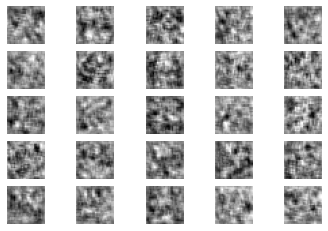

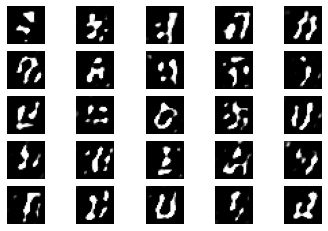

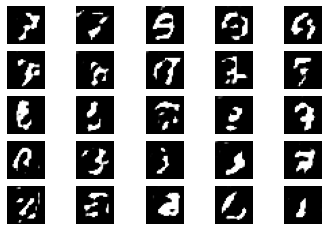

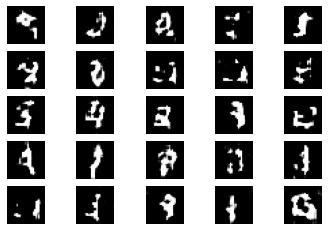

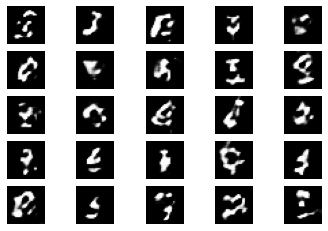

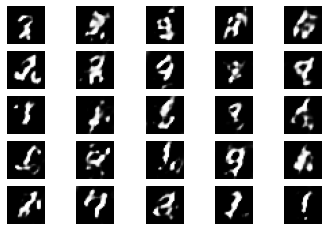

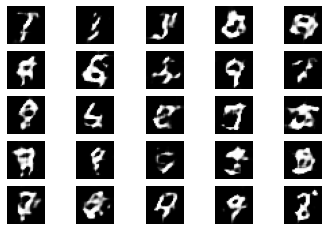

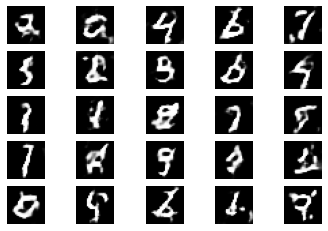

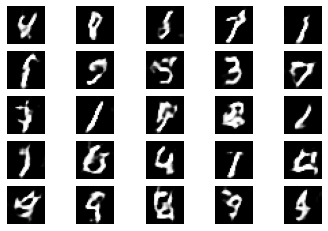

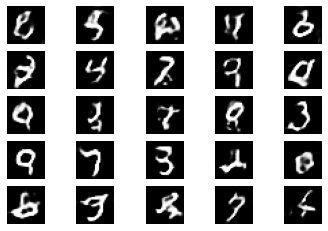

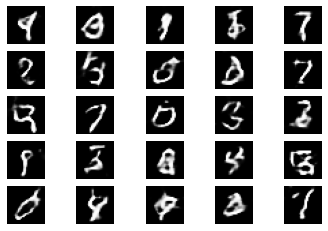

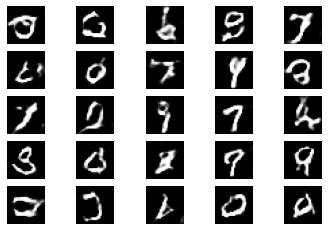

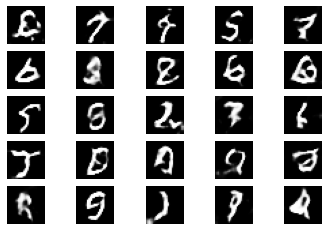

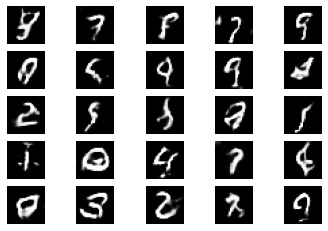

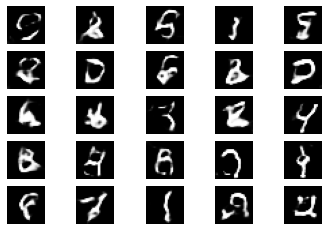

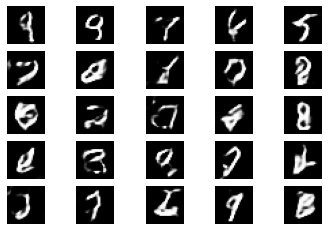

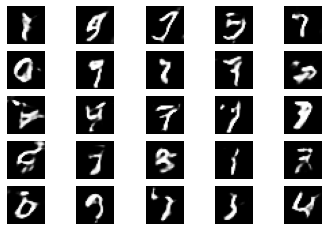

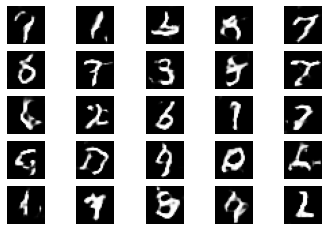

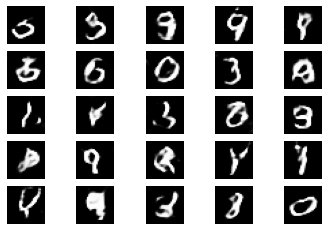

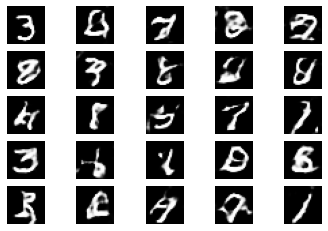

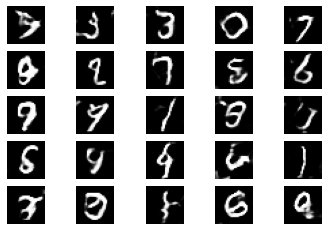

In [94]:
#4000번 반복되고 배치크기는 32, 200번마다 결과 이미지가 저장됨
gan_train(4001, 32, 200)